# Setup CADET and CADET-Match for Windows

The workshop uses Python (and not MATLAB) for interfacing with CADET.

We will start with creating simple simulations before moving on to some more complex simulations with multiple unit operations. We will then create some simple parameter estimation cases and look at how to make more complex ones. After that we will go over the error model and how and why to use it. Finally we will go over some more advanced models like cyclic models and how to build and work with them. There will be more time to talk about these topics during breaks and in the following days of the workshop.

This document is just to help you get ready for the CADET workshop. If you install everything is this document you will be able to run all the examples in the workshop on your laptop and be ready to use CADET for running further simulations after the workshop. 

If you need help with the intstall process please contact us before the workshop.
We will also have live Linux installs on USB sticks for everyone to run on your laptops.

## Create a folder to store all the CADET files

We suggest using the following directory structure for the workshop so that we have a standardized layout to make the workshop flow more smoothly.

1. In your user directory create a folder CADET

    Open File Explorer and in the path paste in **%userprofile%** and hit enter
    
    ![File Explorer](images/WindowsFileBrowser.png "text")
    

2. Create a folder called **CADET**
    
3. In the **CADET** folder create a folder called **Tutorial**

    All the tutorial files will be created in here later automatically
    
4. **Leave this window open for now**

## Download and unzip CADET from

The first thing to do is install the CADET simulator. This is a link to prebuilt high-performance binaries for Windows. 

1. Download CADET

> https://github.com/modsim/CADET/releases/download/v3.1.2/cadet3.1.2-win7-x64.zip 

2. Unzip CADET into the CADET folder we created above in your user directory

    After you do this you should have a folder called **cadet** inside the **CADET** folder
    
    If you have a folder called **cadet3.1.2-win7-x64** look inside there and drag the **cadet** folder into the **CADET** folder.

    
## Install Anaconda

Anaconda is a high-performance scinetific installation of Python that includes many common packages needed for scientific and engineering work. 

1. Install Anaconda for the local user, just download and install the program

If you install Anaconda for all users then all Anaconda terminal commands we run later will need to be run from the Anaconda command prompt run as Administrator.

> https://repo.anaconda.com/archive/Anaconda3-2019.07-Windows-x86_64.exe
    
## Install CADETMatch
### From an Anaconda command prompt in windows run

The next step is to install CADETMatch. This is the parameter estimation and error modeling software for CADET and it will also automatically pull in the CADET python interface. 

1. Open Anaconda Navigator from the start menu
2. Click on environments

    ![Anaconda Environments](images/AnacondaEnvironments.png)

3. Click on the green arrow next to be and click on open terminal

    ![Anaconda Console](images/AnacondaConsole.png)

4. Copy and paste the following command to the terminal window to install CADETMatch

> pip install CADETMatch

### If you are on a network that inteferes with SSL connections you may need to add

> pip install --trusted-host=pypi.python.org --trusted-host=files.pythonhosted.org --trusted-host=pypi.org CADETMatch

## Next enable jupyter notebook extension.

1. Copy and paste the following commands into the Anaconda command prompt

> conda install -c conda-forge jupyter_contrib_nbextensions

> conda install -c conda-forge jupyter_nbextensions_configurator

## Enable gitpython

This will make it so you can just download the whole tutorial over to your system

> conda install gitpython

## Start jupyter notebook and enable the following extensions

1. Click on the start button and type **jupyter** and you will see a **Jupyter Notebook** entry, just click on it to run it and it will start your web browser up with Jupyter notebook  
2. Click on the Nbextensions tab at the top 

    ![Anaconda Console](images/JupyterExtensions.png)

3. Uncheck the checkbox at the top "disable configuration for nbextensions without explicit compatibility (they may break your notebook environment, but can be useful to show for nbextension development)"

    ![Anaconda Console](images/JupyterUncheck.png)

4. Check the box for "Table of Contents (2)"

    ![Anaconda Console](images/AnacondaExtensionsCheck.png)

5. Check the box for "ExecuteTime" (shows how long a cell took to run and when it was last run)

# Run the rest of this tutorial locally

At this point you need to download this tutorial and open it with jupyter notebook to completely the tutorial. The rest of the tutorial involves code running on your computer. In the upper right corner there is a download notebook button.

1. Click the download link in the upper right corner and save it to your **%userprofile%/CADET** directory
2. If the download displays text instead of downloading right click on the link and save it
3. Open the downloaded file locally in jupyter notebook (click on the Files tab)

# Copy the tutorial

The next cell is the first cell you will run locally. Just hit shift-enter or click run to run the next cell. It will connect to github and download the tutorial locally to the folder we created earlier. We can also use it to update to a newer version of the tutorial later.

**This will update to the latest version which will also remove any local changes you may have made to the tutorial files.**

In [1]:
#Python path library support
from pathlib import Path

from git import Repo

#this is where the tutorial will be checked out
tutorial_dir = Path.home() / "CADET" / "Tutorial"

#this is the directory that will be created after it is copied
cadet_tutorial_dir = tutorial_dir / 'CADET-Tutorial'

#if the tutorial has already been copied we need to update it instead of copying it again
if 0:
    if cadet_tutorial_dir.exists():
        repo = Repo(tutorial_dir.as_posix())

        remote = repo.remote()
        remote.fetch()    
        repo.git.reset('--hard','origin/master')
    else:
        Repo.clone_from("https://github.com/modsim/CADET-Tutorial", tutorial_dir)

# Update CADETMatch

CADETMatch is receiving updates often and while writing this documentation it continues to be updated to make the documentation easier. Run the following cell to update to the current version.

In [2]:
import sys
!{sys.executable} -m pip install --upgrade CADETMatch

Requirement already up-to-date: CADETMatch in c:\users\kosh_000\anaconda3\lib\site-packages (0.4.8)


# Verify CADET is working correctly

The next step is to verify that CADET is installed and functioning correctly. To do that download this notebook to your computer. Run the different cells by clicking on the cell and hitting run in the bar or typing shift-enter.

The first step is to import the basic library we need.

1. To run the cell hit shift-enter or click run

In [3]:
#Use to make the notebook draw the full width of the screen
from IPython.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; }</style>"))

#Python path library support
from pathlib import Path

#subprocess allows python to run an external program
import subprocess

#python numeric library
import numpy

#scientific library for python
import scipy

#pandas is python library for data analysis
import pandas

#addict is a library that makes it easier to create nested dictionaries
from addict import Dict

#json is a standard text based format and it used in CADETMatch for the configuration file
import json

#make the plots interactive
%matplotlib inline

#python plotting library
import matplotlib.pyplot as plt

#cadet python interface
from cadet import Cadet

## Set path to CADET bin folder
The next step is to tell the system where CADET can be found.

If you have followed all the instructions above you can just run the following cell and it should automatically work.

In [4]:
#This import is used to detect what operating system is being used to make this code automatic
import platform

#put in the path to the bin folder
cadet_bin_path = Path.home() / "CADET" / "cadet" / "bin"

if platform.system() == 'Windows':
    cadet_path = cadet_bin_path / "cadet-cli.exe"
    lwe_path = cadet_bin_path / "createLWE.exe"
else:
    cadet_path = cadet_bin_path / "cadet-cli"
    lwe_path = cadet_bin_path / "createLWE"

if cadet_path.exists() and lwe_path.exists():
    print("CADET was found. Continue to the next step.")
    Cadet.cadet_path = cadet_path.as_posix()
elif cadet_path.exists() and not lwe_path.exists():
    print("CADET was found but createLWE.exe was not found. Please make sure that none of the files have been moved.")
else:
    print("CADET could not be found. Please check the bin path")

CADET was found. Continue to the next step.


## Verify CADET is working
CADET comes with some basic tests to verify that it is working correctly. If you install from the zip file this should just automatically work. If it does not please report any error messages you get so we can help fix the problem.

In [5]:
ret = subprocess.run([lwe_path.as_posix()], 
            stdout=subprocess.PIPE, stderr=subprocess.PIPE, cwd=cadet_bin_path.as_posix())
if ret.returncode == 0:
    print("Test simulation was created")
else:
    print("Failure: Creation of test simulation ran into problems")
if ret.stdout:
    print('Output', ret.stdout.decode('utf-8'))
if ret.stderr:
    print('Errors', ret.stderr.decode('utf-8'))
    
lwe_hdf5_path = cadet_bin_path / 'LWE.h5'

#create a simulation
sim = Cadet()

#set the path to where a simulation can be found
sim.filename = lwe_hdf5_path.as_posix()

#run the simulation
data = sim.run()

if data.returncode == 0:
    print("Simulation completed successfully")
else:
    print("Simulation failed")

#Load the data from the simulation
sim.load()

Test simulation was created
Simulation completed successfully


## Plotting the simulation
The next step is to plot the simulation to verify that everything ran correctly. Once you run the next code block you should see 3 curves.

Outlets


Text(0, 0.5, 'Concentration (mM)')

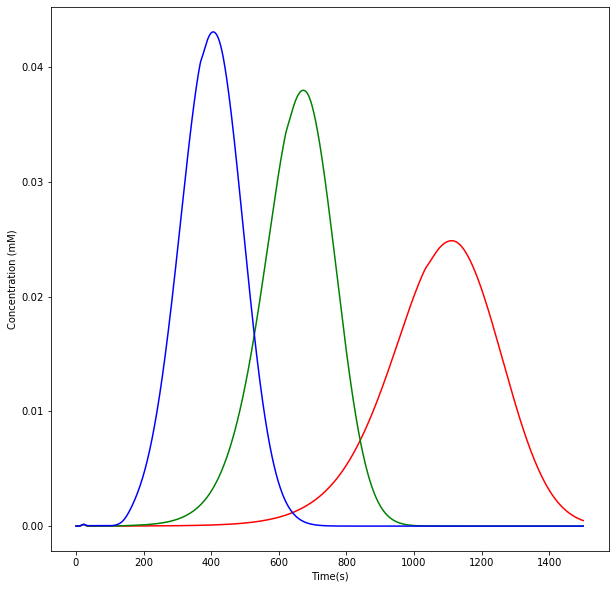

In [6]:
print("Outlets")
plt.figure(figsize=[10,10])
plt.plot(sim.root.output.solution.solution_times,
        sim.root.output.solution.unit_000.solution_outlet_comp_001, color='r')

plt.plot(sim.root.output.solution.solution_times,
        sim.root.output.solution.unit_000.solution_outlet_comp_002, color='g')
        
plt.plot(sim.root.output.solution.solution_times,
        sim.root.output.solution.unit_000.solution_outlet_comp_003, 'b')
plt.xlabel('Time(s)')
plt.ylabel('Concentration (mM)')

## Make some small changes to the simulation
This is to verify that we can write to the file correctly and that parallelization is working.

Simulation completed successfully
Outlets


Text(0, 0.5, 'Concentration (mM)')

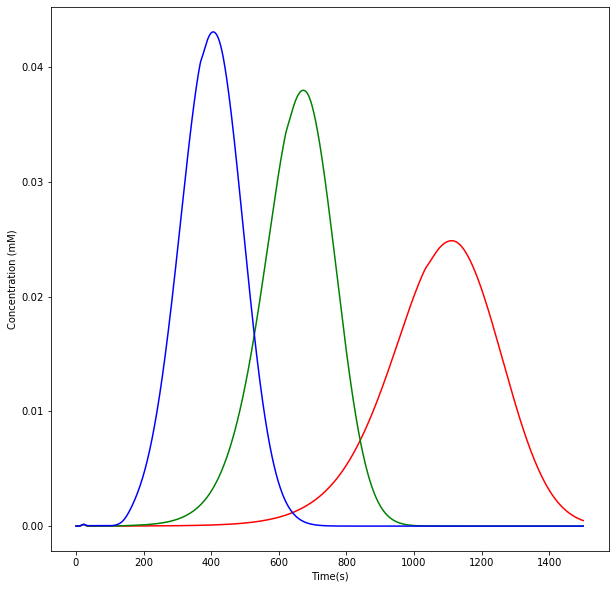

In [7]:
#run simulation in parallel and determine the number of threads automatically
sim.root.input.solver.nthreads = 0

#increase column discretization
sim.root.input.model.unit_001.discretization.ncol = 100

#increase particle discretization
sim.root.input.model.unit_001.discretizationn.npar = 10

sim.save()

data = sim.run()

if data.returncode == 0:
    print("Simulation completed successfully")
else:
    print("Simulation failed")
    
sim.load()

print("Outlets")
plt.figure(figsize=[10,10])
plt.plot(sim.root.output.solution.solution_times,
        sim.root.output.solution.unit_000.solution_outlet_comp_001, color='r')

plt.plot(sim.root.output.solution.solution_times,
        sim.root.output.solution.unit_000.solution_outlet_comp_002, color='g')
        
plt.plot(sim.root.output.solution.solution_times,
        sim.root.output.solution.unit_000.solution_outlet_comp_003, 'b')
plt.xlabel('Time(s)')
plt.ylabel('Concentration (mM)')

# Verify CADETMatch is working
CADETMatch is used for parameter estimation and will be used in the workshop. The example below is a little complex and it will be used with minimal explanation just to verify the software is working. During the workshop we will go over the example in detail.

## Set path
A location needs to be set for CADETMatch to store all the files it needs for running the optimization along with the target simulation and data set.

In [8]:
#set this to a directory on your computer where the cadet tutorial files can be saved
lesson_dir = Path.home() / "CADET" / "lessons"
install = lesson_dir / "lesson_0"
install.mkdir(exist_ok = True, parents=True)

col_dispersion = 5.75e-8
col_porosity = 0.37

## Next we create a very simple simulation
This is a simple experiment to find the porosity and axial dispersion of a column by sending a dextran pulse through the column. There will be no binding or pore penetration. The model is created with minimal explanation and will be explored further in the workshop. For now this is just for testing purposes.

You should just be able to run the following cell without changes and it will generate a graph with a simple pulse in it.

Simulation completed successfully


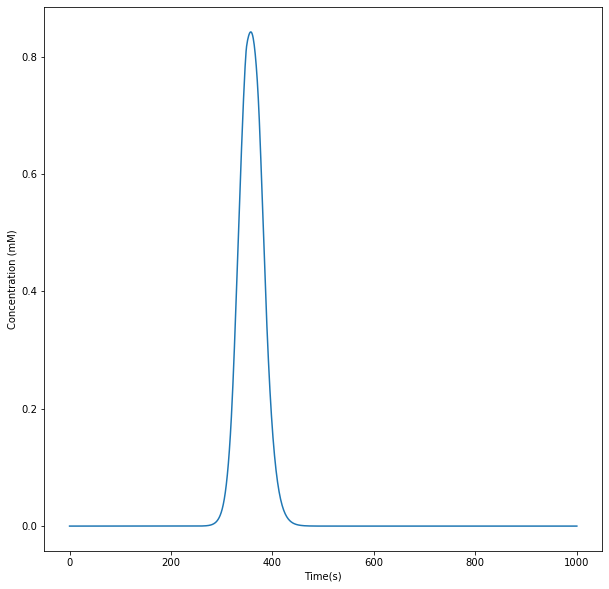

In [9]:
#simple model

simple = Cadet()
simple.filename = (install / 'example.h5').as_posix()

#basic solver settings, these values should rarely be changed
simple.root.input.model.solver.gs_type = 1
simple.root.input.model.solver.max_krylov = 0
simple.root.input.model.solver.max_restarts = 10
simple.root.input.model.solver.schur_safety  = 1e-8

#setup unit operations and connect them together
simple.root.input.model.nunits = 3
simple.root.input.model.connections.nswitches = 1
simple.root.input.model.connections.switch_000.section = 0

#this connects unit 0 to unit 1 and unit 1 to unit 2 with 2.88e-8 m^3/s with all components
simple.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, 2.88e-8,
                                                              1, 2, -1, -1, 2.88e-8]

#create an inlet
simple.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'
simple.root.input.model.unit_000.unit_type = 'INLET'
simple.root.input.model.unit_000.ncomp = 1

simple.root.input.model.unit_000.sec_000.const_coeff = [1.0,]
simple.root.input.model.unit_000.sec_000.lin_coeff = [0.0,]
simple.root.input.model.unit_000.sec_000.quad_coeff = [0.0,]
simple.root.input.model.unit_000.sec_000.cube_coeff = [0.0,]

simple.root.input.model.unit_000.sec_001.const_coeff = [0.0,]
simple.root.input.model.unit_000.sec_001.lin_coeff = [0.0,]
simple.root.input.model.unit_000.sec_001.quad_coeff = [0.0,]
simple.root.input.model.unit_000.sec_001.cube_coeff = [0.0,]

#create a column
simple.root.input.model.unit_001.adsorption_model = 'NONE'
simple.root.input.model.unit_001.col_dispersion = col_dispersion
simple.root.input.model.unit_001.col_length = 0.25
simple.root.input.model.unit_001.col_porosity = col_porosity
simple.root.input.model.unit_001.film_diffusion = [0.0,]
simple.root.input.model.unit_001.init_c = [0.0,]
simple.root.input.model.unit_001.init_q = [0.0,]
simple.root.input.model.unit_001.ncomp = 1
simple.root.input.model.unit_001.par_diffusion = [7e-9,]
simple.root.input.model.unit_001.par_porosity = 0.33
simple.root.input.model.unit_001.par_radius = 4.5e-5
simple.root.input.model.unit_001.par_surfdiffusion = [0.0,]
simple.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITH_PORES'

simple.root.input.model.unit_001.velocity = 1
simple.root.input.model.unit_001.cross_section_area = 1.0386890710931253E-4

#discretization column settings
simple.root.input.model.unit_001.discretization.nbound = [0,]
simple.root.input.model.unit_001.discretization.ncol = 40
simple.root.input.model.unit_001.discretization.par_disc_type = 'EQUIDISTANT_PAR'
simple.root.input.model.unit_001.discretization.schur_safety = 1.0e-8
simple.root.input.model.unit_001.discretization.use_analytic_jacobian = 1
simple.root.input.model.unit_001.discretization.weno.boundary_model = 0
simple.root.input.model.unit_001.discretization.weno.weno_eps = 1e-10
simple.root.input.model.unit_001.discretization.weno.weno_order = 3
simple.root.input.model.unit_001.discretization.gs_type = 1
simple.root.input.model.unit_001.discretization.max_krylov = 0
simple.root.input.model.unit_001.discretization.max_restarts = 10

#create an outlet
simple.root.input.model.unit_002.ncomp = 1
simple.root.input.model.unit_002.unit_type = 'OUTLET'

#solver settings
simple.root.input.solver.user_solution_times = numpy.linspace(0, 1000, 1001)
simple.root.input.solver.sections.nsec = 2
simple.root.input.solver.sections.section_continuity = [0,]
simple.root.input.solver.sections.section_times = [0.0, 50.0, 1000.0]

simple.root.input.solver.time_integrator.abstol = 1e-10
simple.root.input.solver.time_integrator.algtol = 1e-12
simple.root.input.solver.time_integrator.init_step_size = 1e-6
simple.root.input.solver.time_integrator.max_steps = 1000000
simple.root.input.solver.time_integrator.reltol = 1e-10

#automatically run the simulation in parallel
simple.root.input.solver.nthreads = 0

#set what data cadet returns after running the simulation
simple.root.input['return'].write_solution_times = 1
simple.root.input['return'].split_components_data = 1
simple.root.input['return'].unit_000.write_sens_bulk = 0
simple.root.input['return'].unit_000.write_sens_flux = 0
simple.root.input['return'].unit_000.write_sens_inlet = 1
simple.root.input['return'].unit_000.write_sens_outlet = 1
simple.root.input['return'].unit_000.write_sens_particle = 0
simple.root.input['return'].unit_000.write_solution_bulk = 0
simple.root.input['return'].unit_000.write_solution_flux = 0
simple.root.input['return'].unit_000.write_solution_inlet = 1
simple.root.input['return'].unit_000.write_solution_outlet = 1
simple.root.input['return'].unit_000.write_solution_particle = 0

simple.root.input['return'].unit_001 = simple.root.input['return'].unit_000
simple.root.input['return'].unit_002 = simple.root.input['return'].unit_000

simple.save()
data = simple.run()
if data.returncode == 0:
    print("Simulation completed successfully")
    
    simple.load()

    plt.figure(figsize=[10,10])
    plt.plot(simple.root.output.solution.solution_times,
        simple.root.output.solution.unit_001.solution_outlet_comp_000)
    plt.xlabel('Time(s)')
    plt.ylabel('Concentration (mM)')
    
    data = pandas.DataFrame([simple.root.output.solution.solution_times,
                        simple.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
    data.to_csv((install / 'example.csv').as_posix(), index=False, header=False)
    
else:
    print("Simulation failed")

## Setup match configuration
CADETMatch uses a JSON file to specify the problem for parameter estimation and error modeling. Normally this file is just created and edited in a simple text editor. For the purpose of this demonstration the file is going to be created in Python and then written out as a JSON file.

In [10]:
match = Dict()
match.CADETPath = cadet_path.as_posix()
match.baseDir = install.as_posix()
match.resultsDir = 'fit'
match.searchMethod = 'NSGA3'
match.population = 12
match.finalGradRefinement = 1
match.stallGenerations = 5

parameter1 = Dict()
parameter1.transform = 'norm_log'
parameter1.component = -1
parameter1.bound = -1
parameter1.location = "/input/model/unit_001/COL_DISPERSION"
parameter1.min = 1e-10
parameter1.max = 1e-6

parameter2 = Dict()
parameter2.transform = 'norm'
parameter2.component = -1
parameter2.bound = -1
parameter2.location = "/input/model/unit_001/COL_POROSITY"
parameter2.min = 0.2
parameter2.max = 0.5

match.parameters = [parameter1, parameter2]

experiment1 = Dict()
experiment1.csv = "example.csv"
experiment1.isotherm = "/output/solution/unit_001/SOLUTION_OUTLET_COMP_000"
experiment1.HDF5 = "example.h5"
experiment1.name = "main"
experiment1.timeout = 30.0

feature1 = Dict()
feature1.name = "Pulse"
feature1.type = 'DextranShape'

experiment1.features = [feature1,]

match.experiments = [experiment1,]

match_file = install / 'example.json'

with (match_file).open('w') as json_file:
    json.dump(match.to_dict(), json_file, indent='\t')

## Import CADETMatch jupyter notebook interface
The CADETMatch jupyter notebook interface is good for simple testing and running simulations locally. The interface is limited. The full dataset can be found on your drive along with information about identifiable parameters, how well the optimization proceeded and other information.

In [11]:
from CADETMatch.jupyter import Match

## Create a matching session
The next part is to create an object that will run CADETMatch along with holding and processing results. CADETMatch uses a JSON formatted configuration file.

In [12]:
sim = Match((install / 'example.json').as_posix())

## Clearing parameter estimation directory
If you want to delete the parameter estimation fit to restart the fit from scratch you can uncomment the last line in the next cell and run the cell. You can do this if you just want to run the fit again with different settings to see what impact different settings have or if you change the simulation and want to see what happens as a result. 

If you change settings and re-run the fit without deleting the directory it writes to the fit will try to resume from where it left off which won't have the desired result.

In [13]:
resultDir = Path(match.baseDir) / match.resultsDir
print("Your results are located at", resultDir.as_posix())

def deleteResultDir(path):
    #This is to try and make sure that only an actual result directory can be removed
    #And only if no other files have been added to the directory, just in case
    if not path.exists():
        return
    allowed = {'evo', 'grad', 'log', 'mcmc', 'meta', 'misc', 'progress', 
               'space', 'error.csv', 'result.h5', 'progress.csv', 'results.csv'}
    allowed.add(match_file.name)
    okayToRemove = False
    for child in path.iterdir():
        if child.name not in allowed:
            break
    else:
        okayToRemove = True
    if okayToRemove:
        import shutil
        shutil.rmtree(path)

#If you want to delete the fitting process to start over remove the # from the next line and re-run this cell
deleteResultDir(resultDir)

Your results are located at C:/Users/kosh_000/CADET/lessons/lesson_0/fit


## Start parameter estimation
After the matching process has been setup you need to tell the system to go ahead and run the match. If you have a match that has already been run you can setup the simulation and go directly to processing the data. If you have a simulation that is incomplete and you run this code again the matching process will resume close to where it left off.

**This will probably take 5-15 minutes to run depending on how powerful your laptop is.**

If you want to completly restart the matching process you will need to delete the directory created or the system will just try to resume from the last run. 

Note: If Windows firewall asks you to allow python click ok. The system is just communicating locally on the laptop and not with the outside world.

In [14]:
sim.start_sim()

[2019-10-10 16:19:40,050] launcher  INFO    SCOOP 0.7 1.1 on win32 using Python 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 22:01:29) [MSC v.1900 64 bit (AMD64)], API: 1013

[2019-10-10 16:19:40,050] launcher  INFO    Deploying 12 worker(s) over 1 host(s).

[2019-10-10 16:19:40,050] launcher  INFO    Worker distribution: 

[2019-10-10 16:19:40,050] launcher  INFO       127.0.0.1:	11 + origin

[2019-10-10 16:19:42,853] util      (b'127.0.0.1:57464') INFO    example.h5 abstol=4.75e-05  reltol=0.0001

[2019-10-10 16:19:42,981] match     (b'127.0.0.1:57464') INFO    simulation took 0.12799811363220215

[2019-10-10 16:19:43,249] gradFD    (b'127.0.0.1:57464') INFO    grad simulation took 0.23399972915649414

[2019-10-10 16:19:43,250] gradFD    (b'127.0.0.1:57464') INFO    grad C:/Users/kosh_000/CADET/lessons/lesson_0/fit/misc/template_main_grad.h5 abstol=4.75e-11  reltol=1e-10

[2019-10-10 16:19:44,788] util      (b'127.0.0.1:57464') INFO    Generation: -1 	Population: 24 	Aver

[2019-10-10 16:20:37,647] launcher  (127.0.0.1:60346) INFO    Root process is done.

[2019-10-10 16:20:37,648] launcher  (127.0.0.1:60346) INFO    Finished cleaning spawned subprocesses.



## Check if simulation completed successfully
If you scroll down in the previous window you should see something like

```
[2019-10-10 15:56:04,454] match     (b'127.0.0.1:59138') INFO    System has finished

[2019-10-10 15:56:04,454] match     (b'127.0.0.1:59138') INFO    The total runtime was 44.16417694091797 seconds

[2019-10-10 15:56:05,215] launcher  (127.0.0.1:59598) INFO    Root process is done.

[2019-10-10 15:56:05,216] launcher  (127.0.0.1:59598) INFO    Finished cleaning spawned subprocesses.
```

What you are look for is that the System has finished and the total runtime. If both of those are there the optimization completed successfully. 

During graphing you will sometimes see warnings because our test cases are so small that some of the graphs don't have enough points to draw correctly. You can ignore these warnings. 

If you see any other warning just save your notebook and send it to us.

## Plotting results

### Corner plots
For parameter estimation what you are looking for in corner plots is a single unique peak. The more narrow the peak the more identifiable the parameter. The actual distributions are not statistically correct but these kinds of plots are a good qualitative way to judge if your experiments are working. Also, just because a parameter is not identifiable does not mean the parameter is not important. It just means that given the data you gave to the matching software that no single value can be determined. To address this you either need more experiments, different experiments or to just choose a value for the parameter depending on the parameter. We will go over this in more detail in the workshop.

Corner plot in search space


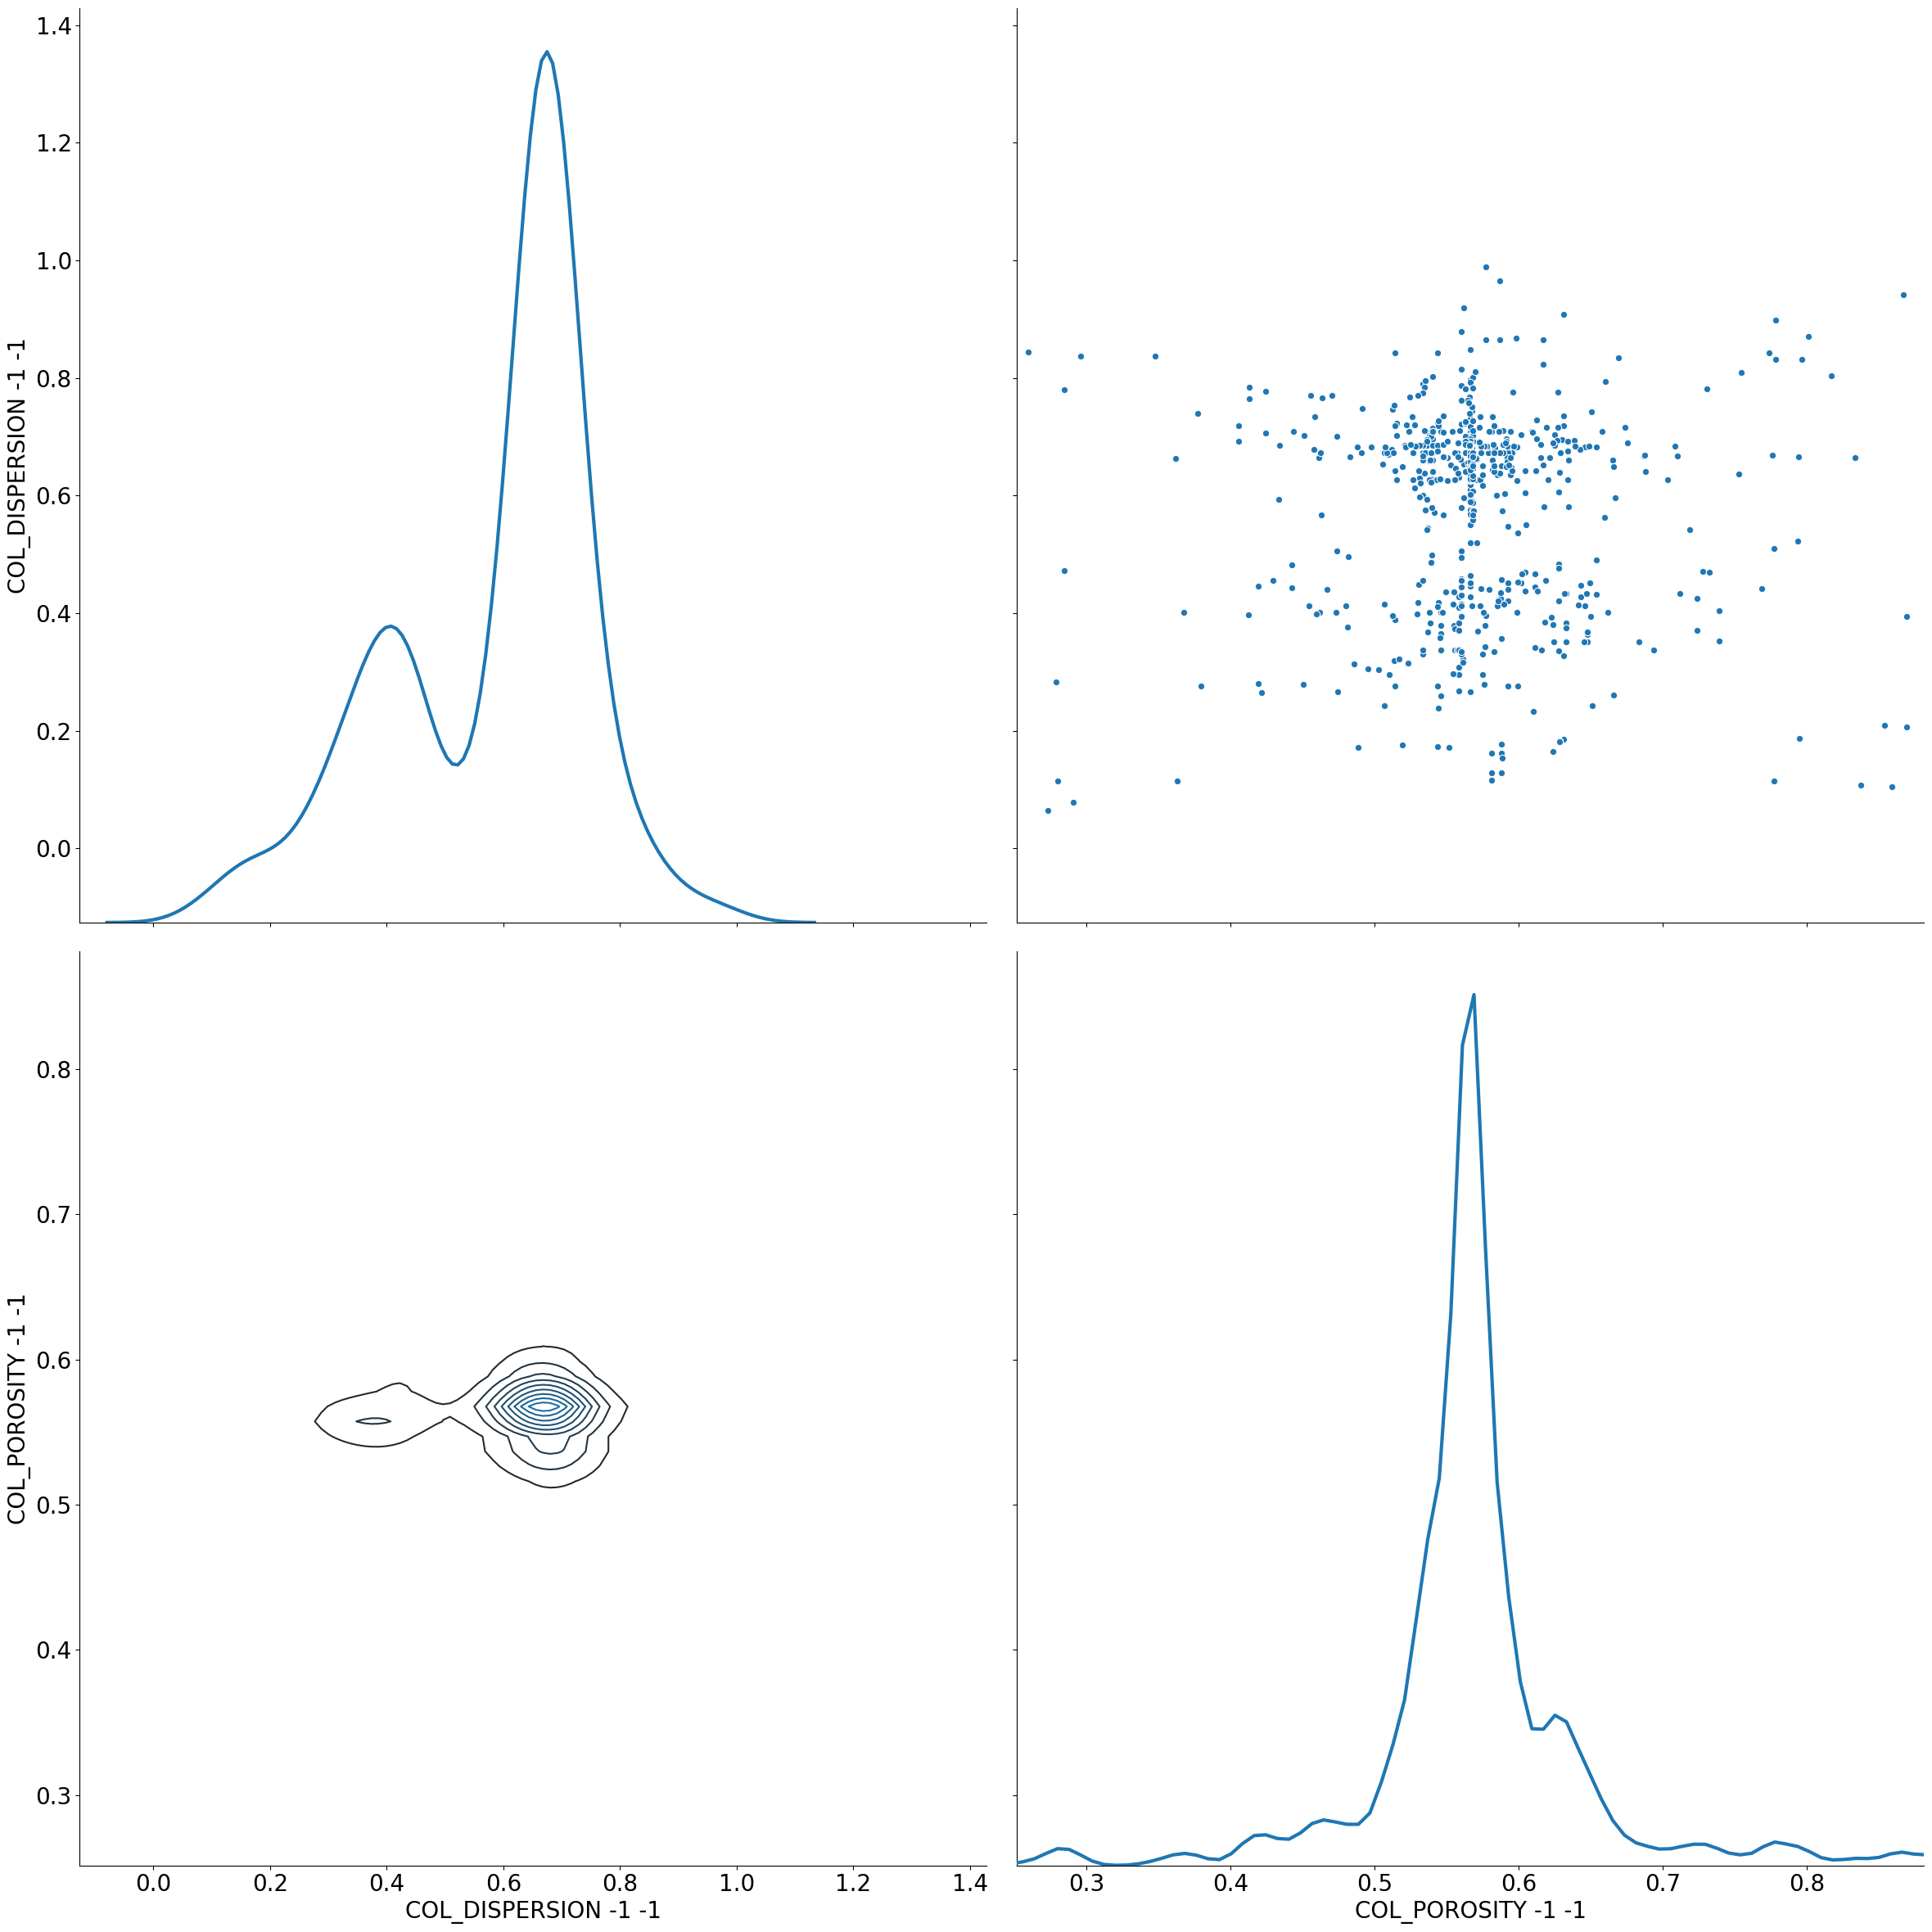

Corner plot in original space


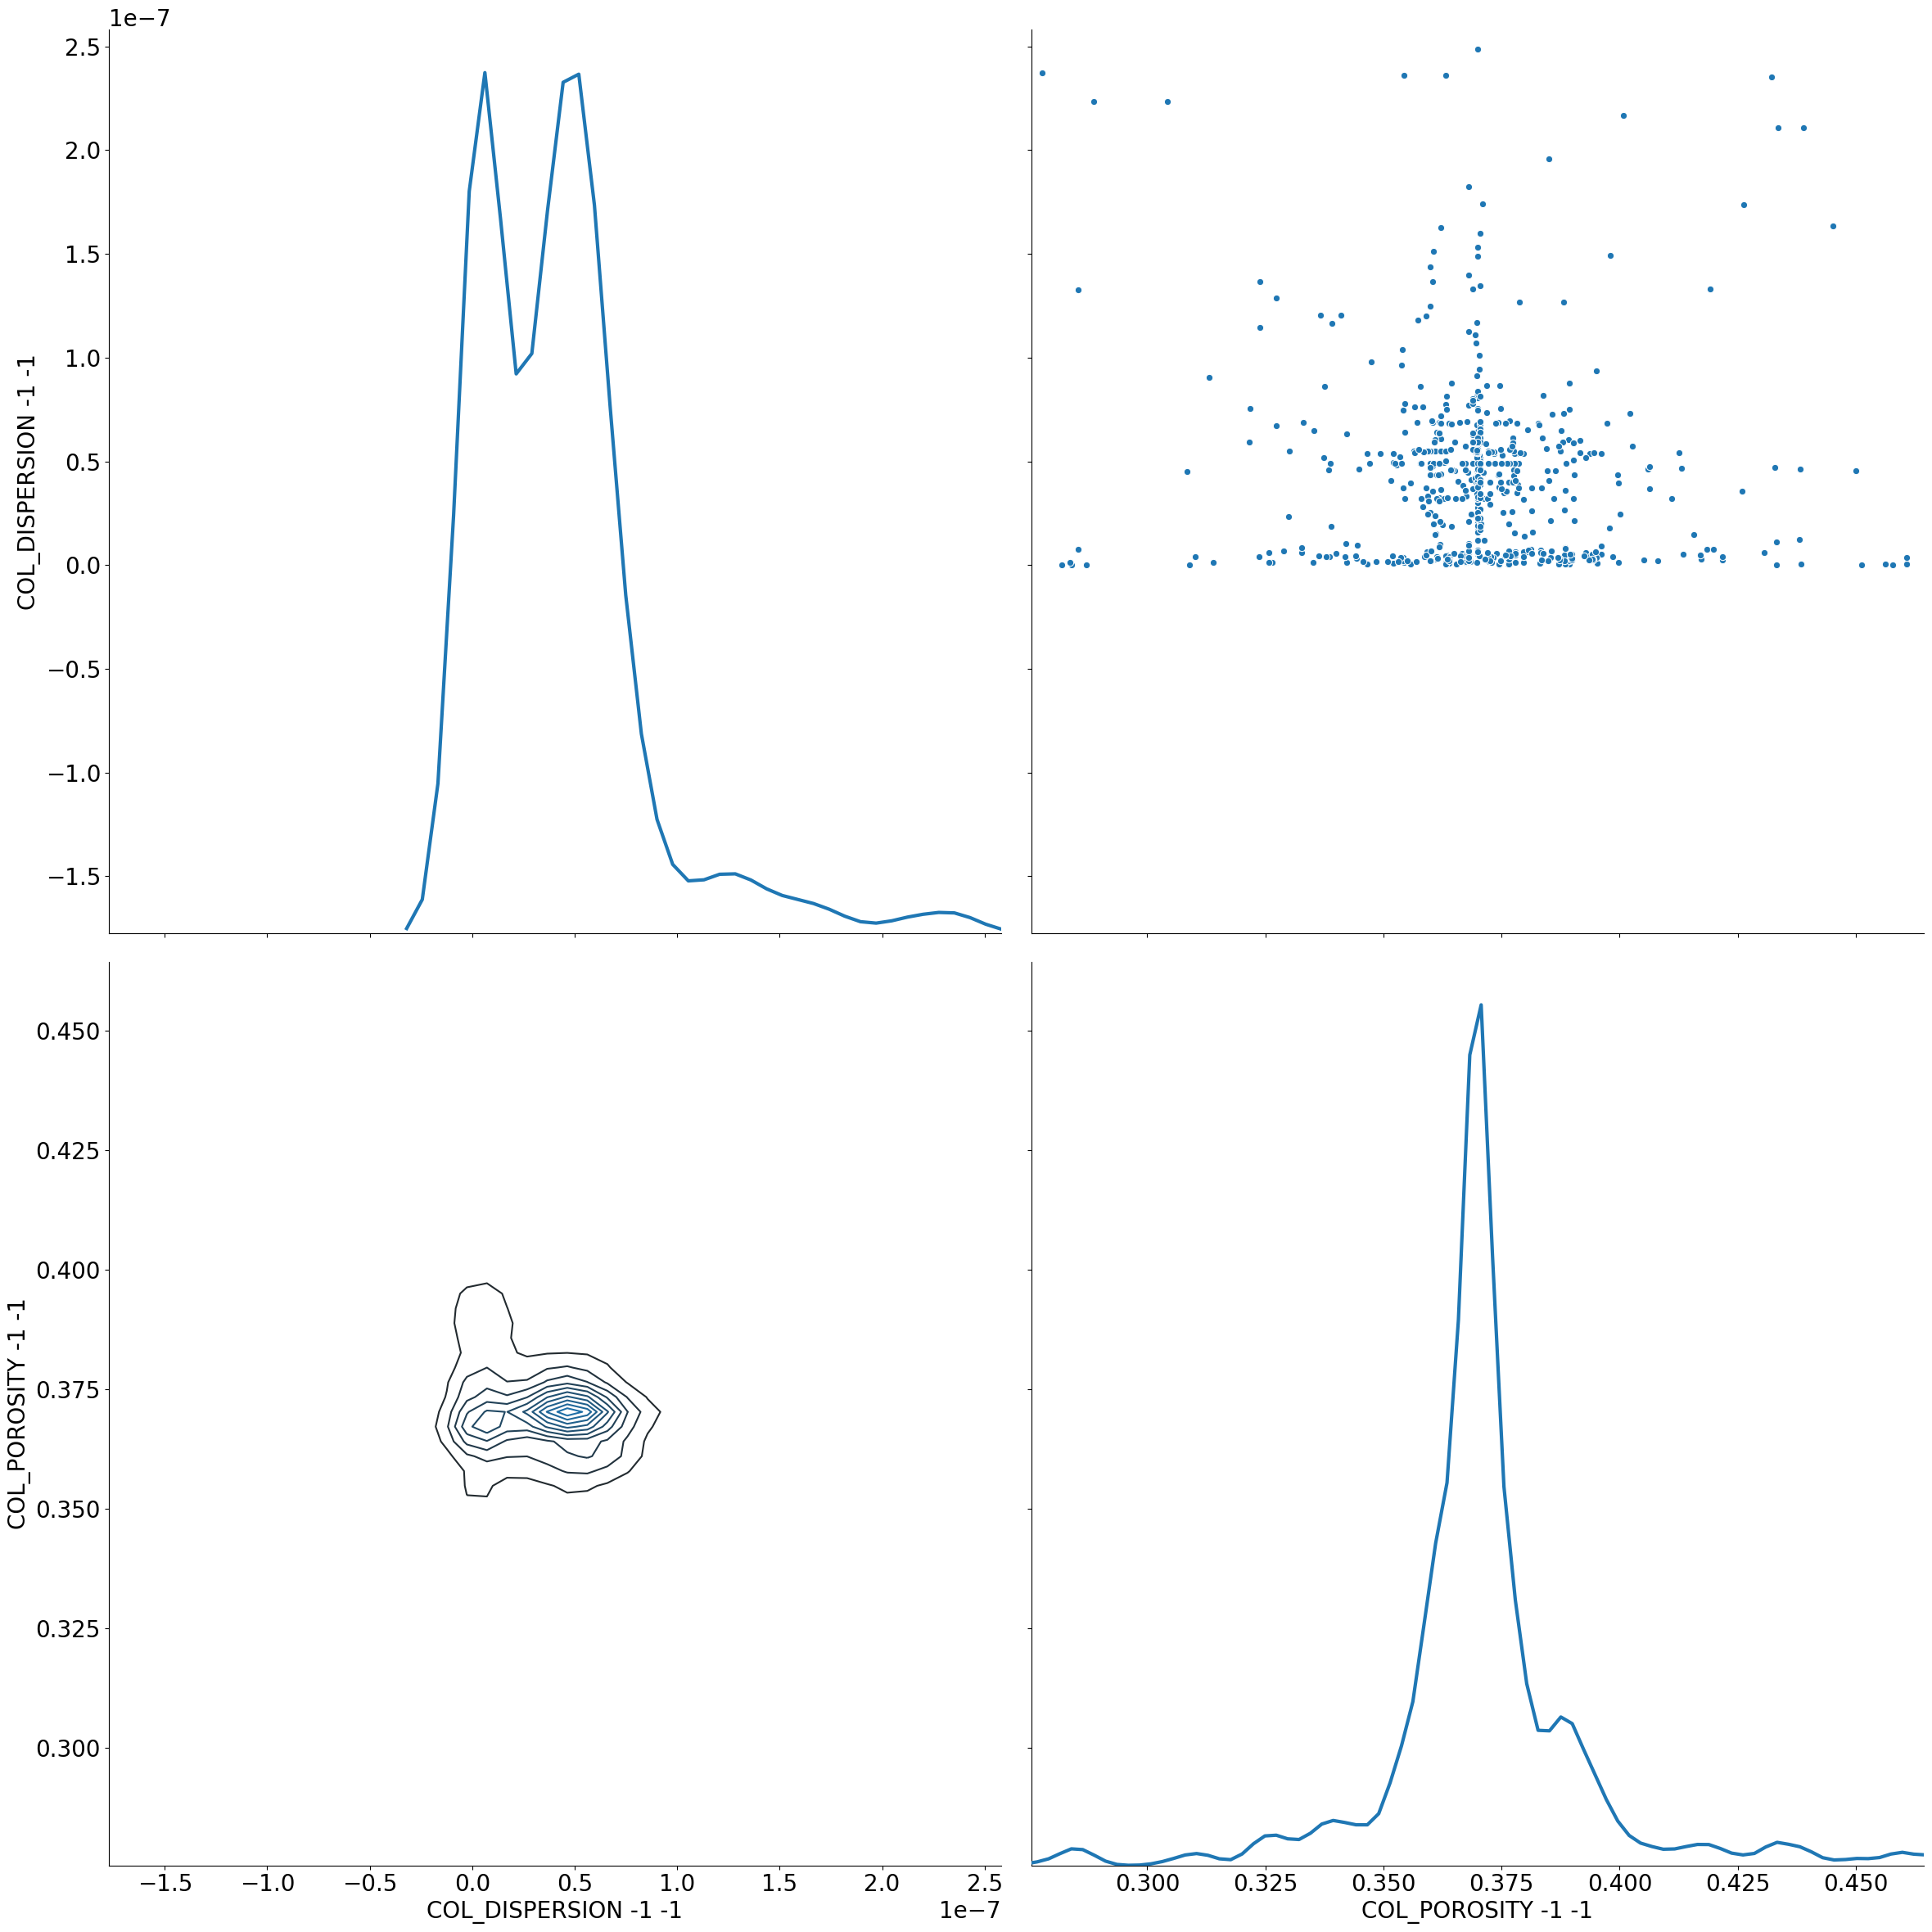

In [15]:
sim.plot_corner()

### Best plots
The next set of plots shows the best result for each of the meta metrics. It shows the ID of the best item, by what measures it is the best result and also the values found along with how good the result was for each measurement. The meta metrics will be explained in the workshop. For now you can look at see how good the fit is.

Best item ae3e601d69d6b392a3bf15281c5ec952 for meta score(s) Product Root Score , Mean Score


,Time,Name,Method,Condition Number,COL_DISPERSION Comp:-1 Bound:-1,COL_POROSITY Comp:-1 Bound:-1,main_Pulse_Shape,main_Pulse_Time,Product Root Score,Min Score,Mean Score,SSE
3,Thu Oct 10 16:20:17 2019,ae3e601d69d6b392a3bf15281c5ec952,GRAD,NaN,5.560172e-08,0.369867,1.0,1.0,1.0,1.0,1.0,0.000058


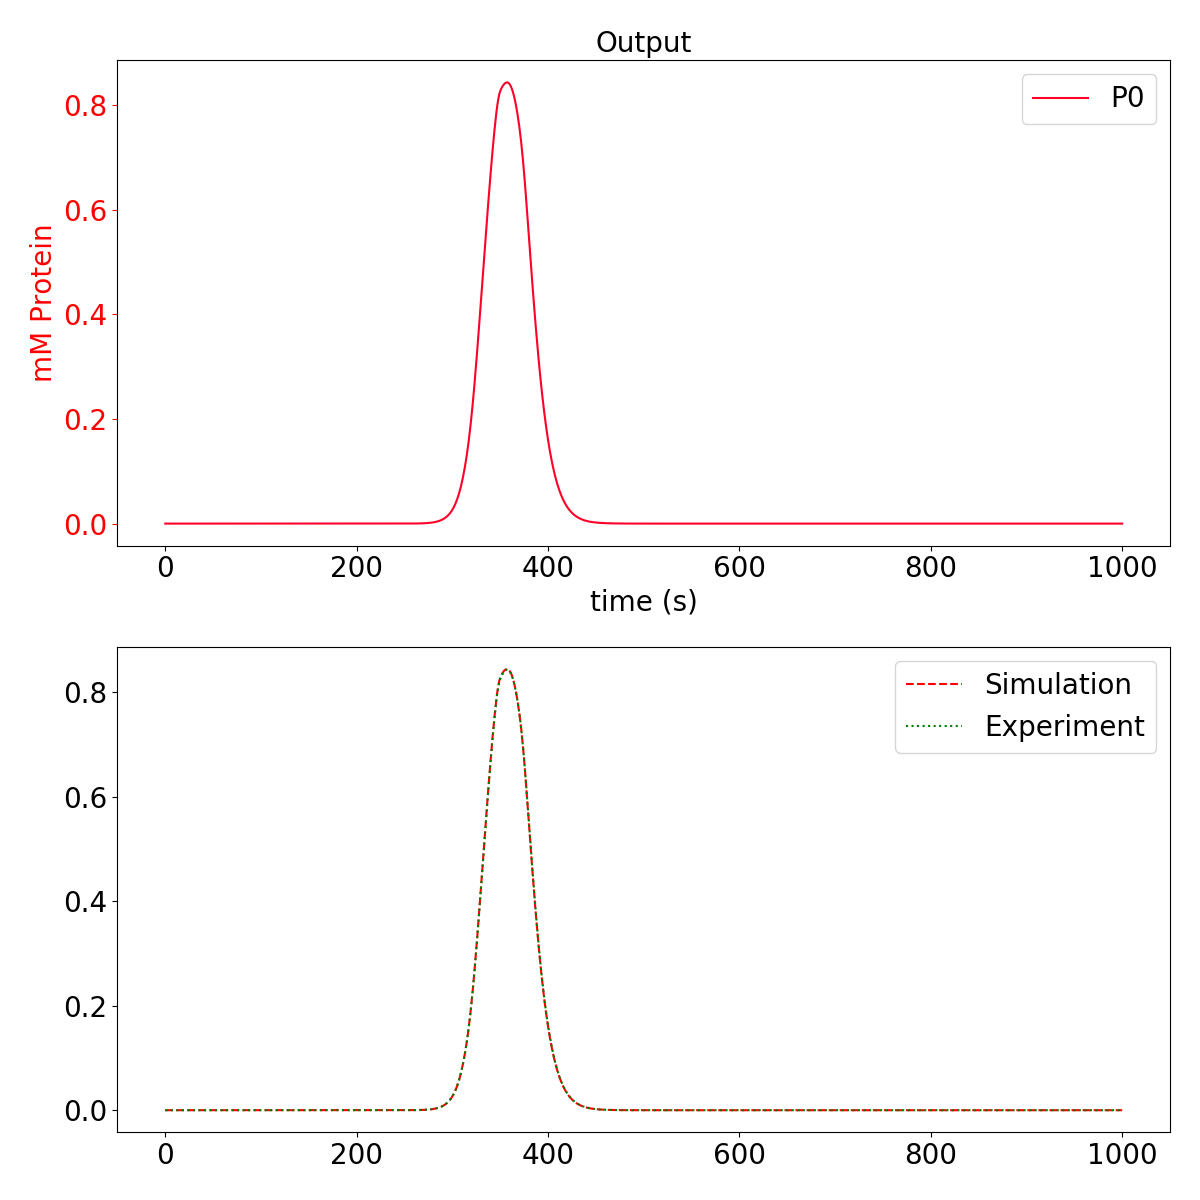

Best item db6a91e0c7ea8fd1d0aac57e6b1eb5d4 for meta score(s) Min Score , SSE


,Time,Name,Method,Condition Number,COL_DISPERSION Comp:-1 Bound:-1,COL_POROSITY Comp:-1 Bound:-1,main_Pulse_Shape,main_Pulse_Time,Product Root Score,Min Score,Mean Score,SSE
2,Thu Oct 10 16:20:02 2019,db6a91e0c7ea8fd1d0aac57e6b1eb5d4,EVO,NaN,5.439926e-08,0.36981,1.0,1.0,1.0,1.0,1.0,0.000105


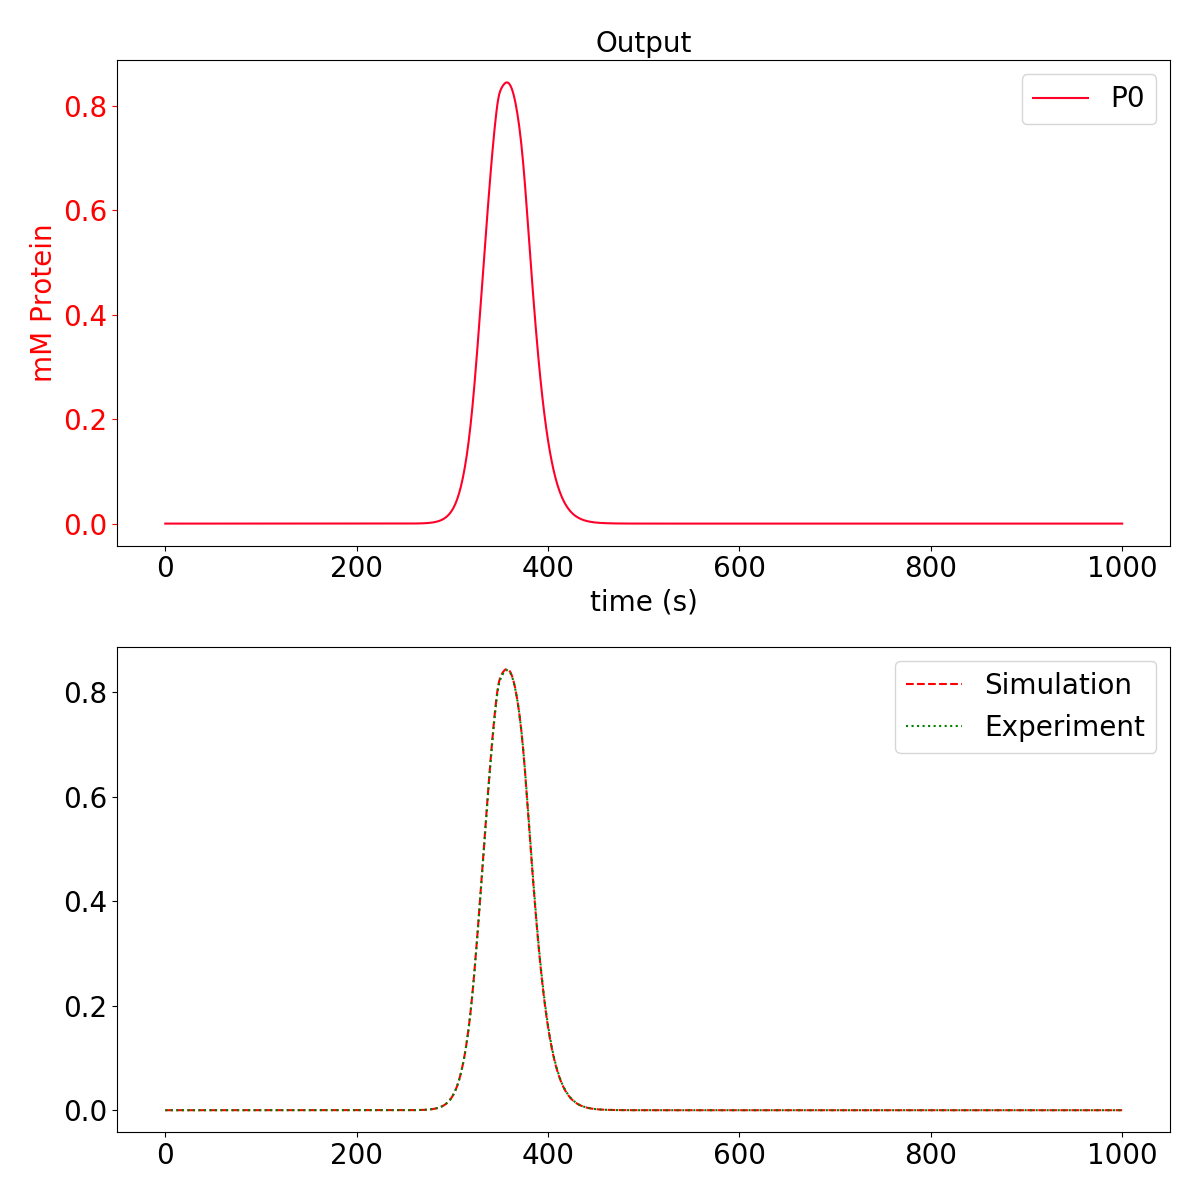

In [16]:
sim.plot_best()

## Simulation error
Since this is a synthetic simulation we can look at how accurate the parameter estimation is. Since we know what the correct answer is we can compare to the results of parameter estimation.

Since this example is just here to verify if the software is working correctly and terminates quickly it is possible that the errors could be quite large. This is normal.

In [17]:
best ,score, best_score = sim.get_best()
true_values = numpy.array([col_dispersion, col_porosity])
for key,value in best_score.items():
    print("Method: %s" % key)
    for name, val, true_value in zip(sim.cache.parameter_headers, value, true_values):
        print("%s = %.2e   error: %.2g%%" % (name, val, numpy.abs(val-true_value)/val*100))
    print('\n')

Method: Product Root Score
COL_DISPERSION Comp:-1 Bound:-1 = 5.56e-08   error: 3.4%
COL_POROSITY Comp:-1 Bound:-1 = 3.70e-01   error: 0.036%


Method: Min Score
COL_DISPERSION Comp:-1 Bound:-1 = 5.44e-08   error: 5.7%
COL_POROSITY Comp:-1 Bound:-1 = 3.70e-01   error: 0.051%


Method: Mean Score
COL_DISPERSION Comp:-1 Bound:-1 = 5.56e-08   error: 3.4%
COL_POROSITY Comp:-1 Bound:-1 = 3.70e-01   error: 0.036%


Method: SSE
COL_DISPERSION Comp:-1 Bound:-1 = 5.44e-08   error: 5.7%
COL_POROSITY Comp:-1 Bound:-1 = 3.70e-01   error: 0.051%


